In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
# YOUR CODE HERE!
file_path = Path("./Resources/lending_data.csv")
lending_data_df = pd.read_csv(file_path)
lending_data_df.head()

# Review the DataFrame
# YOUR CODE HERE!
lending_data_df.head()


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features
y = lending_data_df["loan_status"]

# Separate the y variable, the labels
# YOUR CODE HERE!]
X = lending_data_df.drop(columns=["loan_status"])

# Separate the X variable, the features
# YOUR CODE HERE!
print("Features (X):")
print(X.head())
print("\nLabels (y):")
print(y.head())



Features (X):
   loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  \
0    10700.0          7.672            52800        0.431818                5   
1     8400.0          6.692            43600        0.311927                3   
2     9000.0          6.963            46100        0.349241                3   
3    10700.0          7.664            52700        0.430740                5   
4    10800.0          7.698            53000        0.433962                5   

   derogatory_marks  total_debt  
0                 1       22800  
1                 0       13600  
2                 0       16100  
3                 1       22700  
4                 1       23000  

Labels (y):
0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64


In [4]:
# Review the y variable Series
# YOUR CODE HERE!
print("y variable overview:")
print(y.head())  # Display the first 5 rows
print("\nValue counts of y:")
print(y.value_counts())  # Check the distribution of values
print("\nData type of y:")
print(y.dtype)  # Check the data type


y variable overview:
0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

Value counts of y:
loan_status
0    75036
1     2500
Name: count, dtype: int64

Data type of y:
int64


In [5]:
# Review the X variable DataFrame
# YOUR CODE HERE!
print("x variable overview:")
print(X.head())  # Display the first 5 rows
print("\nValue counts of X:")
print(X.value_counts())  # Check the distribution of values
print("\nData type of X:")



x variable overview:
   loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  \
0    10700.0          7.672            52800        0.431818                5   
1     8400.0          6.692            43600        0.311927                3   
2     9000.0          6.963            46100        0.349241                3   
3    10700.0          7.664            52700        0.430740                5   
4    10800.0          7.698            53000        0.433962                5   

   derogatory_marks  total_debt  
0                 1       22800  
1                 0       13600  
2                 0       16100  
3                 1       22700  
4                 1       23000  

Value counts of X:
loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  derogatory_marks  total_debt
9600.0     7.211          48500            0.381443        4                0                 18500         78
           7.207          48400            0.380165 

### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [6]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
# YOUR CODE HERE!
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [7]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!
model = LogisticRegression(random_state=1)

# Fit the model using training data
# YOUR CODE HERE!
model.fit(X_train, y_train)


C:\Users\16692\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [8]:
# Make a prediction using the testing data
# YOUR CODE HERE!
y_pred = model.predict(X_test)
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

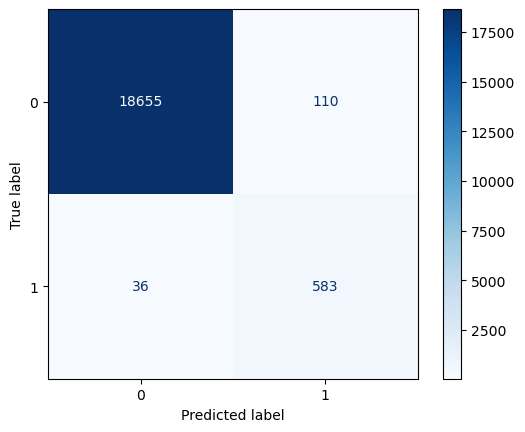

In [9]:
# Generate a confusion matrix for the model
# YOUR CODE HERE!
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")  # Use a blue color map for better visualization

# Show the plot
import matplotlib.pyplot as plt
plt.show()


In [10]:
from sklearn.metrics import classification_report
# Print the classification report for the model
# YOUR CODE HERE!
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.94      0.89       619

    accuracy                           0.99     19384
   macro avg       0.92      0.97      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** Metrics from the categorization report can be used to assess the logistic regression model's ability to forecast the labels 0 (healthy loan) and 1 (high-risk loan):

Regarding label 0 (healthy loan
:

Precision: Shows the proportion of loans that are genuinely healthy compared to those that were forecasted as such. The model produces fewer false positives when the accuracy value is h
igh.
Recall: Indicates how well the model was able to recognize all sound loans. Less false negatives are indicated by a high recall v
alue.
F1-Score: Produces a single performance metric by combining recall and preci
sion.
Regarding label 1 (high-risk
loan):

Precision: Calculates the proportion of loans that are truly high-risk compared to those that were expected 
to be so.
Recall: Indicates the percentage of real high-risk loans that the algorithm properly
 detected.
F1-Score: For high-risk loans, it strikes a balance between recall and
 precision.
Und
eThe model effectively predicts both classes if it has good precision and recall for both labels.
The model performs better for one label than the other if there is a notable disparity in precision, recall, or F1-scores between the two labels.
For this use case, a well-balanced model is essential to prevent misclassifying high-risk loans as healthy or vice vers

.

if the model 

---